<a href="https://colab.research.google.com/github/Lumpenvisual/Algoritmo_de_clasificaci-n/blob/main/Proyecto_de_predicci%C3%B3n_de_riesgo_comunidades_etnicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# proyecto: Análisis y predicción de necesidades para comunidades étnicas en Colombia

##Algoritmos: clasificación y regresión

#Objetivo
Utilizar algoritmos de machine learning para identificar y predecir los riesgos y necesidades de las comunidades étnicas en Colombia, basándose en datos abiertos. El objetivo final es generar información valiosa para la toma de decisiones por parte de organizaciones y entes gubernamentales.


#**Paso 1:** Recopilación y preparación de datos
Necesitamos datos que nos permitan trabajar con los dos tipos de algoritmos que hemos visto. Usaremos las bases de datos que priorizamos en la conversación anterior.

* Fuentes de datos: DANE, Ministerio del Interior, Unidad de Víctimas, IGAC, etc.

**Variables clave:**

Variables de entrada (características): Nivel de educación, acceso a servicios de salud, ubicación geográfica, disponibilidad de agua potable, indicadores económicos, tipo de comunidad (indígena, afrocolombiana, etc.), tasas de desempleo, etc.

**Variables de salida (etiquetas):**

* Clasificación: Riesgo de vulnerabilidad (alto, medio, bajo).

* Regresión: Número de años promedio de escolaridad en una comunidad o el índice de pobreza.


#**Paso 2:** Aplicación del algoritmo de clasificación
Usaremos un algoritmo de clasificación para identificar el riesgo de vulnerabilidad de una comunidad.

**Problema:** Predecir si una comunidad tiene un riesgo alto, medio o bajo de vulnerabilidad.

**Algoritmo a usar:** Random Forest Classifier (RandomForestClassifier de Scikit-learn). Es un algoritmo robusto, ideal para clasificación de múltiples características.

#**Paso 3:** Aplicación del algoritmo de regresión
Utilizaremos un algoritmo de regresión para predecir un valor numérico, como el número de años promedio de escolaridad.

**Problema:** Predecir el número promedio de años de escolaridad en una comunidad basándose en sus características.

**Algoritmo a usar:** Linear Regression (LinearRegression de Scikit-learn).
Utilizaremos este algoritmo para entender la relación entre nuestras variables. Nos dirá si existe una relación lineal entre variables como la inversión en educación y los años de escolaridad.

#**Paso 4:** Interpretación y visualización

**Mapa de riesgo:**  Utilizar los resultados del modelo de clasificación para crear un mapa interactivo de Colombia que muestre las zonas con mayor riesgo de vulnerabilidad.

**Gráficos de factores clave:** Generar gráficos de barras o de dispersión que muestren qué variables tienen mayor impacto en los años de escolaridad o en el riesgo de vulnerabilidad. Por ejemplo, podríamos ver que la falta de acceso a internet es un factor clave en la baja escolaridad.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generamos datos ficticios para 500 comunidades
np.random.seed(42)
data = {
    'educacion': np.random.uniform(0, 10, 500), # Años de escolaridad promedio
    'acceso_salud': np.random.uniform(0, 1, 500), # Proporción de la población con acceso a salud
    'agua_potable': np.random.uniform(0, 1, 500), # Proporción de la población con acceso a agua potable
    'desempleo': np.random.uniform(0.05, 0.4, 500), # Tasa de desempleo
    'inversion_educativa': np.random.uniform(0, 5000, 500) # Inversión per cápita en educación (miles de pesos)
    }

df = pd.DataFrame(data)

# Creamos una columna para el riesgo de vulnerabilidad (clasificación)
# Si el desempleo es alto y el acceso a servicios es bajo, el riesgo es alto.
def asignar_riesgo(row):
    if row['desempleo'] > 0.3 and row['acceso_salud'] < 0.4:
        return 'Alto'
    elif row['desempleo'] > 0.2 or row['acceso_salud'] < 0.6:
        return 'Medio'
    else:
        return 'Bajo'

df['riesgo_vulnerabilidad'] = df.apply(asignar_riesgo, axis=1)

# Creamos una columna para los años de escolaridad promedio (regresión)
# La escolaridad se relaciona positivamente con la inversión educativa y el acceso a servicios.
df['años_escolaridad_promedio'] = df['educacion'] * 1.5 + (df['inversion_educativa'] / 1000) + np.random.normal(0, 2, 500)
df['años_escolaridad_promedio'] = df['años_escolaridad_promedio'].clip(0, 20)

print(df.head())

   educacion  acceso_salud  agua_potable  desempleo  inversion_educativa  \
0   3.745401      0.698162      0.185133   0.231679          1308.528419   
1   9.507143      0.536096      0.541901   0.217714          1234.893995   
2   7.319939      0.309528      0.872946   0.058975          4531.272903   
3   5.986585      0.813795      0.732225   0.169437          1247.730999   
4   1.560186      0.684731      0.806561   0.183068          1359.748631   

  riesgo_vulnerabilidad  años_escolaridad_promedio  
0                 Medio                   7.968875  
1                 Medio                  16.786040  
2                 Medio                  16.622391  
3                  Bajo                  10.406770  
4                  Bajo                   3.305351  


In [ ]:
# Prepare data for classification
X_clf = df[['educacion', 'acceso_salud', 'agua_potable', 'desempleo', 'inversion_educativa']]
y_clf = df['riesgo_vulnerabilidad']

# Split data for classification
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42, stratify=y_clf)

# Prepare data for regression
X_reg = df[['educacion', 'acceso_salud', 'agua_potable', 'desempleo', 'inversion_educativa']]
y_reg = df['años_escolaridad_promedio']

# Split data for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

print("Classification data shapes:")
print(f"X_train_clf: {X_train_clf.shape}, y_train_clf: {y_train_clf.shape}")
print(f"X_test_clf: {X_test_clf.shape}, y_test_clf: {y_test_clf.shape}")

print("\nRegression data shapes:")
print(f"X_train_reg: {X_train_reg.shape}, y_train_reg: {y_train_reg.shape}")
print(f"X_test_reg: {X_test_reg.shape}, y_test_reg: {y_test_reg.shape}")

Classification data shapes:
X_train_clf: (400, 5), y_train_clf: (400,)
X_test_clf: (100, 5), y_test_clf: (100,)

Regression data shapes:
X_train_reg: (400, 5), y_train_reg: (400,)
X_test_reg: (100, 5), y_test_reg: (100,)



--- Resultados del modelo de Clasificación ---
Precisión: 96.00%


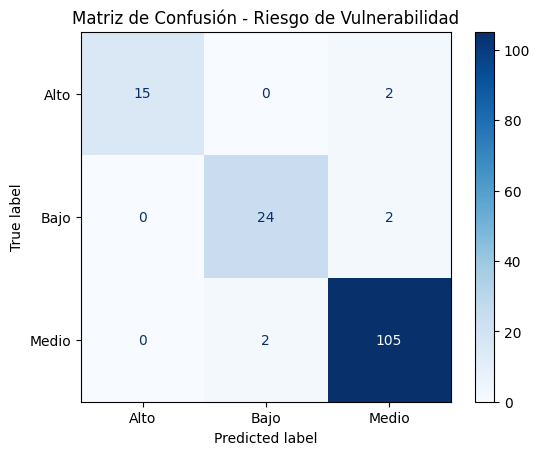

In [ ]:
#Algoritmo de clasificación: Predicción del riesgo
# Definir las características (X) y la etiqueta (y) para clasificación
X_clas = df[['educacion', 'acceso_salud', 'agua_potable', 'desempleo']]
y_clas = df['riesgo_vulnerabilidad']

# Dividir datos en conjuntos de entrenamiento y prueba
X_train_clas, X_test_clas, y_train_clas, y_test_clas = train_test_split(X_clas, y_clas, test_size=0.3, random_state=42)

# Entrenar el modelo de RandomForest
model_clasificacion = RandomForestClassifier(n_estimators=100)
model_clasificacion.fit(X_train_clas, y_train_clas)

# Evaluar el modelo
y_pred_clas = model_clasificacion.predict(X_test_clas)
print("\n--- Resultados del modelo de Clasificación ---")
print(f"Precisión: {accuracy_score(y_test_clas, y_pred_clas):.2%}")

# Visualizar la matriz de confusión
cm_clas = confusion_matrix(y_test_clas, y_pred_clas)
disp_clas = ConfusionMatrixDisplay(confusion_matrix=cm_clas, display_labels=model_clasificacion.classes_)
disp_clas.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión - Riesgo de Vulnerabilidad')
plt.show()


In [ ]:
#Algoritmo de regresión: Predicción de años de escolaridad
# Definir las características (X) y la etiqueta (y) para regresión
X_reg = df[['inversion_educativa', 'acceso_salud', 'agua_potable']]
y_reg = df['años_escolaridad_promedio']

# Dividir datos en conjuntos de entrenamiento y prueba
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# Entrenar el modelo de Regresión Lineal
model_regresion = LinearRegression()
model_regresion.fit(X_train_reg, y_train_reg)

# Evaluar el modelo
y_pred_reg = model_regresion.predict(X_test_reg)
print("\n--- Resultados del modelo de Regresión ---")
print(f"Error cuadrático medio: {mean_squared_error(y_test_reg, y_pred_reg):.2f}")
print(f"Puntuación R-cuadrado: {model_regresion.score(X_test_reg, y_test_reg):.2f}")




--- Resultados del modelo de Regresión ---
Error cuadrático medio: 23.59
Puntuación R-cuadrado: 0.07
